In [1]:
# ADP 23회 통계분석

In [2]:
## 2-1. 진공관 수명
## 공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정

In [3]:
## 귀무가설 : 데이터의 중위수는 1만시간이다 
## 연구가설 : 데이터의 중위수는 1만시간이 아니다

In [4]:
## 유효한 데이터의 개수 산출

In [6]:
import pandas as pd
df = pd.read_csv('data/adp23-p2.csv')

In [8]:
df.describe()

,life span
count,12.000000
mean,9793.333333
std,436.709459
min,8900.000000
25%,9725.000000
50%,10000.000000
75%,10005.000000
max,10300.000000


In [22]:
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다.')
print('불필요한 데이터의 개수는 ', df[df['life span']==10000].shape[0],'개 이다')

중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다.
불필요한 데이터의 개수는  4 개 이다


In [23]:
print('불필요한 데이터 4개를 제외한 유효데이터는 아래의 8개 이다')
df_filter = df[df['life span'] != 10000]
df_filter

불필요한 데이터 4개를 제외한 유효데이터는 아래의 8개 이다


,name,life span
1,sample2,9000
2,sample3,9500
5,sample6,8900
6,sample7,9900
7,sample8,10100
8,sample9,10300
9,sample10,10020
11,sample12,9800


In [24]:
## 검정통계량 및 연구가설 채택여부 

In [29]:
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_filter['life span']-10000)
print('검정통계량은 ',static,'이다.')
print('p-value는 ',pvalue,'로 5% 유의 수준에서 귀무가설을 기각할 수 없다.')
print('따라서, 연구가설을 채택하지 않는다. ')

검정통계량은  8.5 이다.
pvalue는  0.1953125 로 5% 유의 수준에서 귀무가설을 기각할 수 없다.
따라서, 연구가설을 채택하지 않는다. 


In [30]:
## 2-2. 코로나 시계열 데이터

In [31]:
## 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 
## 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

In [32]:
df = pd.read_csv('data/adp23-p3_covid.csv')

In [33]:
df.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


In [36]:
target = df.groupby(['location', 'date']).sum().groupby(level=0).cumsum() 
# groupby(level=0)은 1st level(=location) 기준으로 정렬
target.columns = ['cumulative sum']
target.head()

cumulative sum
location date                      
Austria  2021-01-01          2096.0
         2021-01-02          3487.0
         2021-01-03          4953.0
         2021-01-04          6595.0
         2021-01-05          8906.0

In [37]:
target = target.reset_index()
target

,location,date,cumulative sum
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,3487.0
2,Austria,2021-01-03,4953.0
3,Austria,2021-01-04,6595.0
4,Austria,2021-01-05,8906.0
...,...,...,...
12195,Vanuatu,2021-10-28,5.0
12196,Vanuatu,2021-10-29,5.0
12197,Vanuatu,2021-10-30,5.0
12198,Vanuatu,2021-10-31,5.0


In [44]:
## 위에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외)
## 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 
## 계층적 군집 분석을 위해 덴드로그램 작성

In [46]:
from scipy.spatial import distance
import statsmodels.api as sm

name =[]
for lo in target.location.unique():
    
    v = sm.tsa.stattools.acf(target[target.location==lo]['cumulative sum'], nlags=50, fft=False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)

ValueError: The condensed distance matrix must contain only finite values.

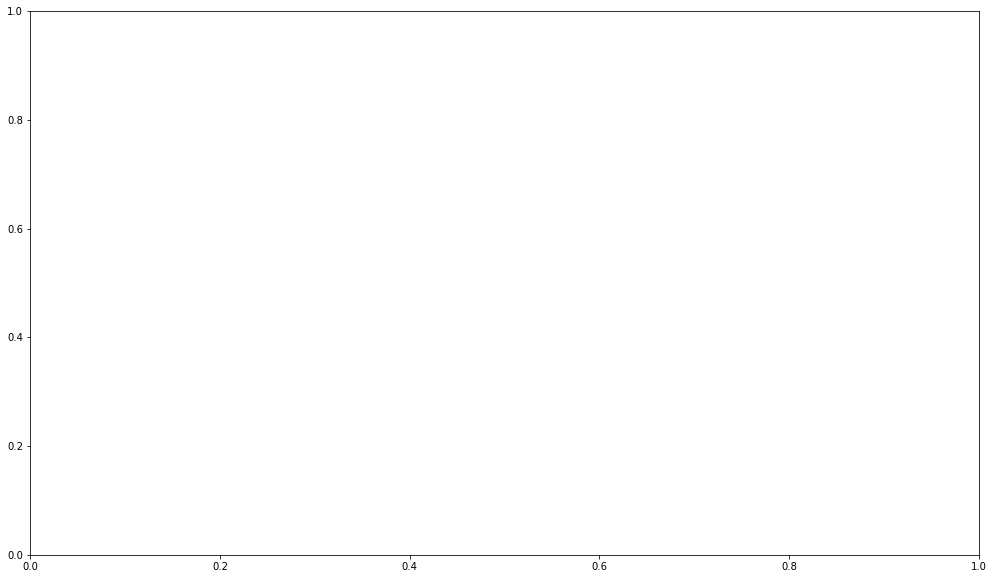

In [48]:
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


data =v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = sch.linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:,2])
dend_res3 = sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()